In [1]:
import numpy as np
import torch 
from tqdm import *

from graphvampnets.processing.dataprocessing import Preprocessing, Postprocessing_vamp
from graphvampnets.processing.graphloader import GraphPairLoader
from graphvampnets.layers.graph import GraphVAMPNetLayer
from graphvampnets.vamp.vampnet import VAMPNet
from graphvampnets.utils import set_random_seed, ContourPlot2D

In [2]:
import os
import numpy as np

base_dir = '../data2'

output_file_path = 'positions_data.dat'

total_arrays = 0

file_counter = 0
max_files = 5

for category in ['successes', 'failures_130']:
    category_dir = os.path.join(base_dir, category)
    
    for seed_folder in os.listdir(category_dir):
        seed_dir = os.path.join(category_dir, seed_folder)
        if os.path.isdir(seed_dir):
            for file_name in os.listdir(seed_dir):
                if file_name.endswith('.npz'):
                    total_arrays += 1
                    file_counter += 1
                    if file_counter >= max_files:
                        break
            if file_counter >= max_files:
                break
    if file_counter >= max_files:
        break

array_shape = (2000, 121, 3)

data = np.memmap(output_file_path, dtype='float32', mode='w+', shape=(total_arrays, *array_shape))

file_counter = 0

index = 0

for category in ['failures_130', 'successes']:
    category_dir = os.path.join(base_dir, category)
    
    for seed_folder in os.listdir(category_dir):
        seed_dir = os.path.join(category_dir, seed_folder)
        if os.path.isdir(seed_dir):
            for file_name in os.listdir(seed_dir):
                if file_name.endswith('.npz'):
                    file_path = os.path.join(seed_dir, file_name)
                    
                    with np.load(file_path) as data_file:
                        positions = data_file['positions']
                        
                        data[index] = positions
                        index += 1
                        file_counter += 1
                        
                        if file_counter >= max_files:
                            break
            if file_counter >= max_files:
                break
    if file_counter >= max_files:
        break

data.flush()

print(f'Shape of data: {data.shape}')


Shape of data: (5, 2000, 121, 3)


### Preprocess data
##### (Note that the 9d9f dataset is so large that appropriate downsampling is recommended)

In [3]:
import sys
import os

module_path = os.path.abspath(os.path.join('..', 'graphvampnets/processing'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataprocessing import Preprocessing

# import mdtraj as md
### Here we use mdtraj to convert original xtc file to pairwise distances data.
### To install mdtraj, use command 'pip install mdtraj'

pre = Preprocessing()
print(data[0].shape)
indices = list(range(0, 121, 3))
pw = pre.transform2pw(data, indices)
# print(pw.shape)

# pw = []
# for i in range(0, 40):
#     t = md.load("../data/original_trajs/allTraj/npt-pro-traj%i.xtc"%(i+1), top="../data/original_trajs/9d9f.gro")
#     d = md.compute_distances(traj=t, atom_pairs=pairs)
#     pw.append(d)
pw = np.array(pw)
print(pw.shape)

(2000, 121, 3)
(5, 2000, 40)


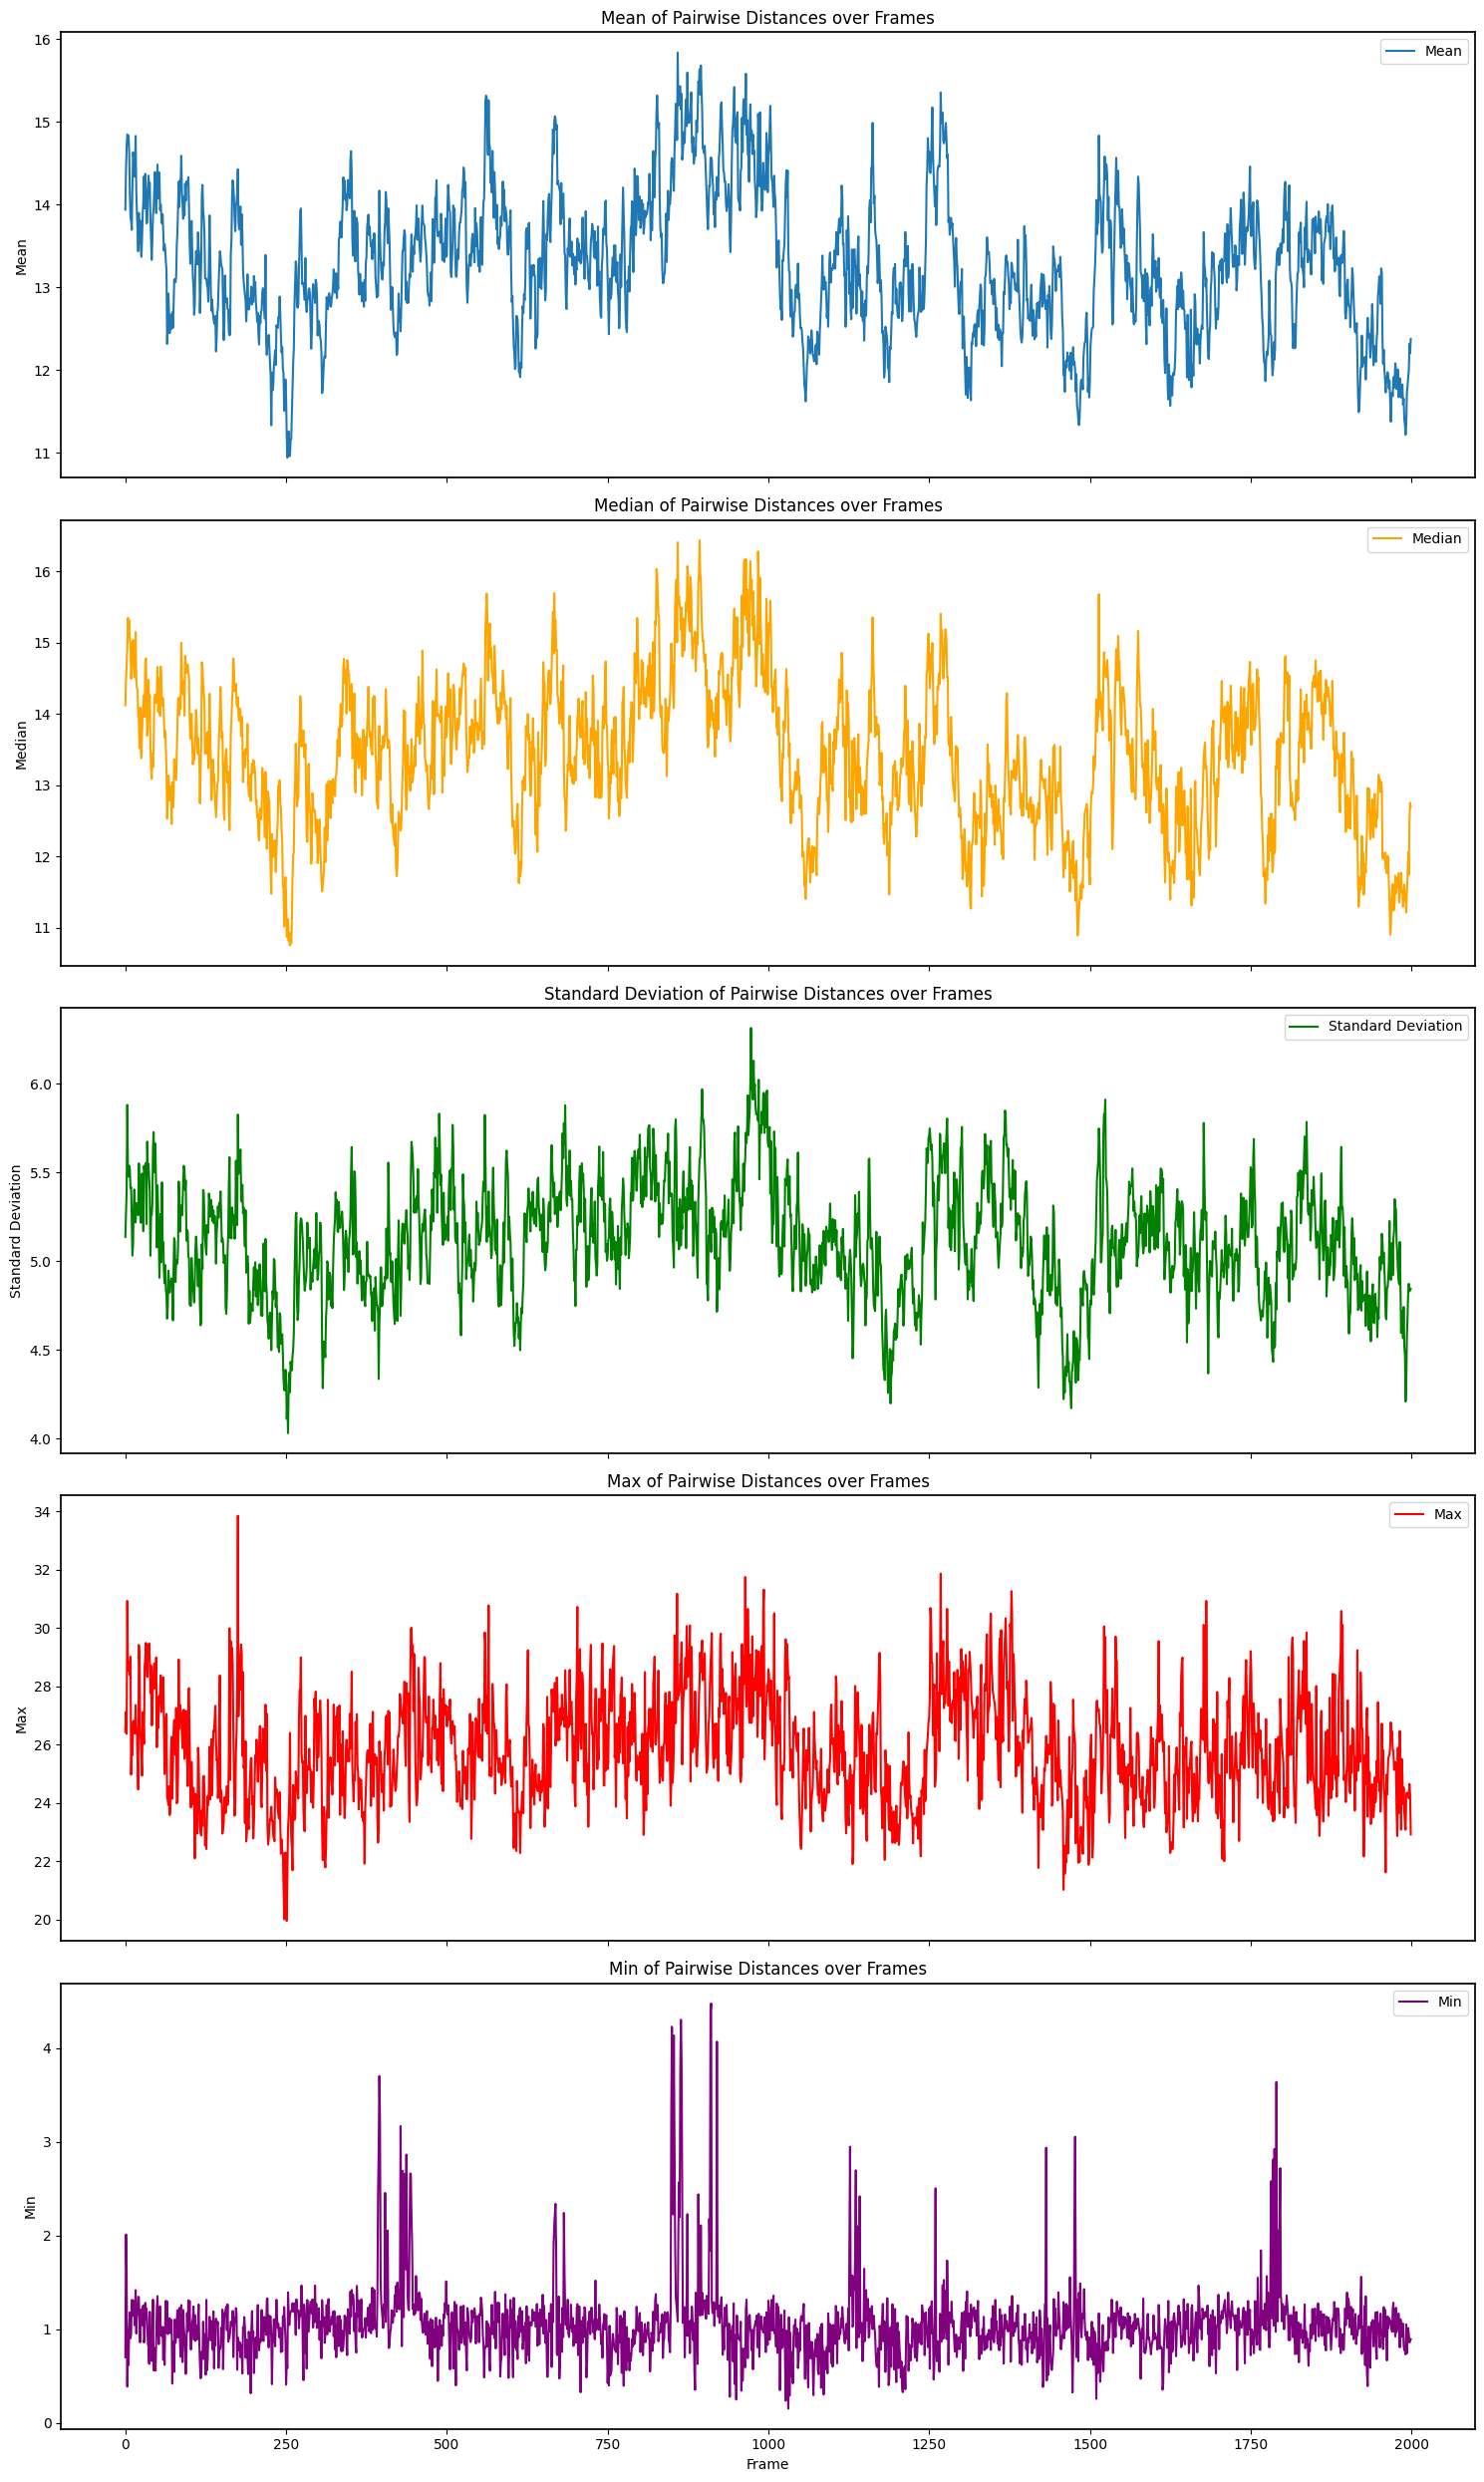

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pairwise_statistics(pw):
    mean_values = np.mean(pw, axis=(0, 2))
    median_values = np.median(pw, axis=(0, 2))
    std_values = np.std(pw, axis=(0, 2))
    max_values = np.max(pw, axis=(0, 2))
    min_values = np.min(pw, axis=(0, 2))
    
    frames = np.arange(pw.shape[1])

    fig, axs = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

    axs[0].plot(frames, mean_values, label='Mean')
    axs[0].set_ylabel('Mean')
    axs[0].set_title('Mean of Pairwise Distances over Frames')
    axs[0].legend()

    axs[1].plot(frames, median_values, label='Median', color='orange')
    axs[1].set_ylabel('Median')
    axs[1].set_title('Median of Pairwise Distances over Frames')
    axs[1].legend()

    axs[2].plot(frames, std_values, label='Standard Deviation', color='green')
    axs[2].set_ylabel('Standard Deviation')
    axs[2].set_title('Standard Deviation of Pairwise Distances over Frames')
    axs[2].legend()

    axs[3].plot(frames, max_values, label='Max', color='red')
    axs[3].set_ylabel('Max')
    axs[3].set_title('Max of Pairwise Distances over Frames')
    axs[3].legend()

    axs[4].plot(frames, min_values, label='Min', color='purple')
    axs[4].set_xlabel('Frame')
    axs[4].set_ylabel('Min')
    axs[4].set_title('Min of Pairwise Distances over Frames')
    axs[4].legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the statistics
plot_pairwise_statistics(pw)




In [5]:
pre = Preprocessing()

graph_data_for_training, graph_data_for_projection = pre.transform2graph(pw,num_nbrs=30,num_atoms=41)

0
40
(40,)
1
40
(40,)
2
40
(40,)
3
40
(40,)
4
40
(40,)
5
40
(40,)
6
40
(40,)
7
40
(40,)
8
40
(40,)
9
40
(40,)
10
40
(40,)
11
40
(40,)
12
40
(40,)
13
40
(40,)
14
40
(40,)
15
40
(40,)
16
40
(40,)
17
40
(40,)
18
40
(40,)
19
40
(40,)
20
40
(40,)
21
40
(40,)
22
40
(40,)
23
40
(40,)
24
40
(40,)
25
40
(40,)
26
40
(40,)
27
40
(40,)
28
40
(40,)
29
40
(40,)
30
40
(40,)
31
40
(40,)
32
40
(40,)
33
40
(40,)
34
40
(40,)
35
40
(40,)
36
40
(40,)
37
40
(40,)
38
40
(40,)
39
40
(40,)
40
40
(40,)
41
40
(40,)
42
40
(40,)
43
40
(40,)
44
40
(40,)
45
40
(40,)
46
40
(40,)
47
40
(40,)
48
40
(40,)
49
40
(40,)
50
40
(40,)
51
40
(40,)
52
40
(40,)
53
40
(40,)
54
40
(40,)
55
40
(40,)
56
40
(40,)
57
40
(40,)
58
40
(40,)
59
40
(40,)
60
40
(40,)
61
40
(40,)
62
40
(40,)
63
40
(40,)
64
40
(40,)
65
40
(40,)
66
40
(40,)
67
40
(40,)
68
40
(40,)
69
40
(40,)
70
40
(40,)
71
40
(40,)
72
40
(40,)
73
40
(40,)
74
40
(40,)
75
40
(40,)
76
40
(40,)
77
40
(40,)
78
40
(40,)
79
40
(40,)
80
40
(40,)
81
40
(40,)
82
40
(40,)
83
40
(40,)
84

In [6]:
print(len(graph_data_for_training))
print(graph_data_for_training[0].shape)

print(len(graph_data_for_projection))
print(graph_data_for_projection[0].shape)

5
(2000, 1230, 3)
5
(2460001, 3)


### Train GraphVAMPnets

In [7]:
pre = Preprocessing()
graph_dataset = pre.create_dataset(graph_data_for_training,lag_time=20)
print(len(graph_dataset))

9900


In [8]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")
print(device)

cpu


In [9]:
set_random_seed(42)

val = int(len(graph_dataset)*0.2)
train_data, val_data = torch.utils.data.random_split(graph_dataset, [len(graph_dataset)-val, val])

loader_train = GraphPairLoader(num_atoms=41, dataset=train_data, batch_size=1000, shuffle=True)
loader_val = GraphPairLoader(num_atoms=41, dataset=val_data, batch_size=1000, shuffle=False)

# atom_class_idx = torch.tensor([4,5,6,5,5,6,5,3,0,1,2,2,1,0,4,5,6,5,5,6,5,3,0,1,2,2,1,0])
lobe = GraphVAMPNetLayer(num_atoms=41, num_conv=5, atom_emb_dim=8, dmin=0, dmax=6, step=0.5, graph_emb_dim=2)
lobe = lobe.to(device)
from copy import deepcopy
lobe_lagged = deepcopy(lobe).to(device=device)
net = VAMPNet(lobe=lobe, lobe_lagged=lobe_lagged, learning_rate=1e-3, device=device)
net.fit(loader_train, n_epochs=60,
                    validation_loader=loader_val, progress=tqdm)

epoch:   2%|▏         | 1/60 [04:42<4:37:41, 282.39s/it]

0 1.0110912322998047


epoch:   3%|▎         | 2/60 [09:15<4:27:33, 276.79s/it]

1 1.0172309875488281


epoch:   5%|▌         | 3/60 [13:10<4:04:55, 257.82s/it]

2 1.0227808952331543


epoch:   7%|▋         | 4/60 [17:01<3:50:45, 247.25s/it]

3 1.028838872909546


epoch:   8%|▊         | 5/60 [20:52<3:41:11, 241.30s/it]

4 1.0372426509857178


epoch:  10%|█         | 6/60 [24:42<3:33:48, 237.56s/it]

5 1.0657631158828735


epoch:  12%|█▏        | 7/60 [28:35<3:28:22, 235.89s/it]

6 1.1608507633209229


epoch:  13%|█▎        | 8/60 [32:24<3:22:44, 233.93s/it]

7 1.2262682914733887


epoch:  15%|█▌        | 9/60 [36:15<3:17:52, 232.80s/it]

8 1.2930251359939575


epoch:  17%|█▋        | 10/60 [40:06<3:13:39, 232.39s/it]

9 1.3614256381988525


epoch:  18%|█▊        | 11/60 [44:00<3:10:06, 232.78s/it]

10 1.436887502670288


epoch:  20%|██        | 12/60 [47:53<3:06:16, 232.85s/it]

11 1.4872303009033203


epoch:  22%|██▏       | 13/60 [51:46<3:02:22, 232.83s/it]

12 1.5265543460845947


epoch:  23%|██▎       | 14/60 [55:38<2:58:18, 232.58s/it]

13 1.5530285835266113


epoch:  25%|██▌       | 15/60 [59:29<2:54:13, 232.30s/it]

14 1.5767083168029785


epoch:  27%|██▋       | 16/60 [1:03:20<2:50:00, 231.83s/it]

15 1.5930428504943848


epoch:  28%|██▊       | 17/60 [1:07:12<2:46:07, 231.80s/it]

16 1.6117476224899292


epoch:  30%|███       | 18/60 [1:11:04<2:42:22, 231.97s/it]

17 1.6247344017028809


epoch:  32%|███▏      | 19/60 [1:14:56<2:38:35, 232.09s/it]

18 1.638486385345459


epoch:  33%|███▎      | 20/60 [1:18:48<2:34:35, 231.88s/it]

19 1.6515202522277832


epoch:  35%|███▌      | 21/60 [1:22:39<2:30:31, 231.57s/it]

20 1.6644043922424316


epoch:  37%|███▋      | 22/60 [1:26:30<2:26:35, 231.46s/it]

21 1.6794148683547974


epoch:  38%|███▊      | 23/60 [1:30:22<2:22:55, 231.77s/it]

22 1.6921014785766602


epoch:  40%|████      | 24/60 [1:34:14<2:18:59, 231.65s/it]

23 1.7088515758514404


epoch:  42%|████▏     | 25/60 [1:38:03<2:14:42, 230.92s/it]

24 1.7227528095245361


epoch:  43%|████▎     | 26/60 [1:41:54<2:10:55, 231.04s/it]

25 1.73717200756073


epoch:  45%|████▌     | 27/60 [1:45:46<2:07:12, 231.29s/it]

26 1.7532875537872314


epoch:  47%|████▋     | 28/60 [1:49:37<2:03:20, 231.25s/it]

27 1.767770528793335


epoch:  48%|████▊     | 29/60 [1:53:29<1:59:31, 231.34s/it]

28 1.7834200859069824


epoch:  50%|█████     | 30/60 [1:57:21<1:55:48, 231.61s/it]

29 1.7971221208572388


epoch:  52%|█████▏    | 31/60 [2:01:13<1:52:02, 231.81s/it]

30 1.8092610836029053


epoch:  53%|█████▎    | 32/60 [2:05:03<1:47:56, 231.31s/it]

31 1.824342966079712


epoch:  55%|█████▌    | 33/60 [2:08:54<1:44:01, 231.18s/it]

32 1.833471655845642


epoch:  57%|█████▋    | 34/60 [2:12:45<1:40:10, 231.17s/it]

33 1.8511837720870972


epoch:  58%|█████▊    | 35/60 [2:16:37<1:36:21, 231.27s/it]

34 1.8621034622192383


epoch:  60%|██████    | 36/60 [2:20:28<1:32:28, 231.19s/it]

35 1.8740742206573486


epoch:  62%|██████▏   | 37/60 [2:24:20<1:28:41, 231.39s/it]

36 1.8876891136169434


epoch:  63%|██████▎   | 38/60 [2:28:11<1:24:48, 231.31s/it]

37 1.9012644290924072


epoch:  65%|██████▌   | 39/60 [2:32:03<1:21:04, 231.66s/it]

38 1.9114665985107422


epoch:  67%|██████▋   | 40/60 [2:35:53<1:17:01, 231.08s/it]

39 1.9262464046478271


epoch:  68%|██████▊   | 41/60 [2:39:43<1:13:02, 230.65s/it]

40 1.939725399017334


epoch:  70%|███████   | 42/60 [2:43:37<1:09:32, 231.83s/it]

41 1.9549736976623535


epoch:  72%|███████▏  | 43/60 [2:47:30<1:05:46, 232.13s/it]

42 1.9644516706466675


epoch:  73%|███████▎  | 44/60 [2:51:23<1:01:54, 232.18s/it]

43 1.9840750694274902


epoch:  75%|███████▌  | 45/60 [2:55:15<58:04, 232.27s/it]  

44 1.9997888803482056


epoch:  77%|███████▋  | 46/60 [2:59:07<54:09, 232.08s/it]

45 2.0142502784729004


epoch:  78%|███████▊  | 47/60 [3:02:58<50:15, 231.97s/it]

46 2.0274899005889893


epoch:  80%|████████  | 48/60 [3:06:51<46:24, 232.04s/it]

47 2.0423531532287598


epoch:  82%|████████▏ | 49/60 [3:10:42<42:28, 231.71s/it]

48 2.0605716705322266


epoch:  83%|████████▎ | 50/60 [3:14:33<38:35, 231.55s/it]

49 2.0723350048065186


epoch:  85%|████████▌ | 51/60 [3:18:25<34:46, 231.80s/it]

50 2.083566427230835


epoch:  87%|████████▋ | 52/60 [3:22:14<30:47, 230.89s/it]

51 2.097452163696289


epoch:  88%|████████▊ | 53/60 [3:26:05<26:56, 230.92s/it]

52 2.1038997173309326


epoch:  90%|█████████ | 54/60 [3:29:56<23:06, 231.05s/it]

53 2.1189050674438477


epoch:  92%|█████████▏| 55/60 [3:33:47<19:14, 230.93s/it]

54 2.1218314170837402


epoch:  93%|█████████▎| 56/60 [3:37:39<15:25, 231.30s/it]

55 2.1292829513549805


epoch:  95%|█████████▌| 57/60 [3:41:35<11:38, 232.72s/it]

56 2.134769916534424


epoch:  97%|█████████▋| 58/60 [3:45:31<07:47, 233.59s/it]

57 2.1362051963806152


epoch:  98%|█████████▊| 59/60 [3:49:24<03:53, 233.45s/it]

58 2.150272846221924


59 2.1491551399230957


In [10]:
graphvampnets_cvs = net.transform(graph_data_for_projection,return_cv=True,lag_time=20)

In [11]:
torch.save(lobe.state_dict(),'../data2/graphvampnets_model_50epochs_3.pt')
np.save('../data2/graphvampnets_cvs_50epochs_3.npy',graphvampnets_cvs)
np.save('../data2/training_scores_50epochs_3.npy',net.training_scores)
np.save('../data2/validation_scores_50epochs_3.npy',net.validation_scores)


In [12]:
array = np.load('../data2/validation_scores_50epochs_3.npy')
print(array)

[1.01109123 1.01723099 1.0227809  1.02883887 1.03724265 1.06576312
 1.16085076 1.22626829 1.29302514 1.36142564 1.4368875  1.4872303
 1.52655435 1.55302858 1.57670832 1.59304285 1.61174762 1.6247344
 1.63848639 1.65152025 1.66440439 1.67941487 1.69210148 1.70885158
 1.72275281 1.73717201 1.75328755 1.76777053 1.78342009 1.79712212
 1.80926108 1.82434297 1.83347166 1.85118377 1.86210346 1.87407422
 1.88768911 1.90126443 1.9114666  1.9262464  1.9397254  1.9549737
 1.96445167 1.98407507 1.99978888 2.01425028 2.0274899  2.04235315
 2.06057167 2.072335   2.08356643 2.09745216 2.10389972 2.11890507
 2.12183142 2.12928295 2.13476992 2.1362052  2.15027285 2.14915514]


In [13]:
array = np.load('../data2/training_scores_50epochs_3.npy')
print(array)

[1.00331879 1.00912428 1.01374424 1.00972199 1.00397098 1.0101378
 1.01023555 1.00664818 1.01180267 1.01231229 1.02595913 1.00958037
 1.01283312 1.00595772 1.02207279 1.0198288  1.01067221 1.01789498
 1.0130378  1.02934599 1.0141536  1.03268433 1.03920758 1.02271283
 1.02087665 1.02861404 1.04027629 1.02012897 1.02196527 1.0406872
 1.03648305 1.02917838 1.04258299 1.04269683 1.04970706 1.03671992
 1.03187954 1.04501605 1.03480756 1.02465212 1.06797588 1.04359698
 1.03978872 1.04517329 1.08142209 1.06733119 1.05657697 1.07048118
 1.0883683  1.10161304 1.1120187  1.1377511  1.11453199 1.1607604
 1.14993525 1.18578446 1.15416014 1.28840792 1.20193028 1.25880849
 1.21492171 1.28282404 1.21154499 1.28387213 1.28624678 1.21964085
 1.21331024 1.25948453 1.37785304 1.28857136 1.35238004 1.43585563
 1.31412196 1.38068473 1.37759185 1.44094515 1.37729943 1.34618413
 1.37942362 1.45455217 1.39605308 1.39722574 1.46769929 1.38662338
 1.50541198 1.58472443 1.47812569 1.47001505 1.56340587 1.5818009

In [20]:
array = np.load('../data2/graphvampnets_cvs_50epochs.npy')
print(array)

[[[-1.12390921e-01  1.03649557e+00]
  [-1.21309040e-02  2.13450480e+00]
  [-1.08109824e-01  1.22828770e+00]
  ...
  [-7.59793838e-05  1.07902968e+00]
  [-1.55238518e-02  1.32600534e+00]
  [ 6.82657072e-03  1.93553317e+00]]

 [[-1.04184672e-01  2.18795404e-01]
  [-6.47346899e-02  7.42174923e-01]
  [-6.61199465e-02  4.33443904e-01]
  ...
  [-6.81237578e-02  2.26936191e-01]
  [-4.83501479e-02  4.21062917e-01]
  [-2.03766469e-02  4.77353670e-02]]

 [[-1.44706488e-01 -5.17715991e-01]
  [-9.31003168e-02 -1.01978004e+00]
  [-6.76416457e-02 -5.40059149e-01]
  ...
  [-1.36379153e-01 -7.37756610e-01]
  [-4.39104848e-02  5.50914466e-01]
  [-5.84703498e-02  8.40267360e-01]]

 [[-1.18660912e-01 -3.53885591e-01]
  [-1.50748044e-01 -7.61584759e-01]
  [-1.66199401e-01 -6.00360215e-01]
  ...
  [-5.90811148e-02 -5.04965603e-01]
  [-1.32018015e-01 -1.02088881e+00]
  [-1.02723666e-01 -7.29717016e-01]]

 [[-1.08741120e-01  4.76928502e-02]
  [-6.49906322e-02 -1.65578499e-02]
  [-6.04850054e-02  5.34533858e-

### Implied time scales plots of CVs

In [14]:
its = []
lag_times = [1,2,5,10,15,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
for lagt in lag_times:
    post = Postprocessing_vamp(n_dims=2,lag_time=np.int64(lagt),dtype=np.float64)
    its.append(post.fit(graphvampnets_cvs).time_scales)
its = np.array(its)

Text(0, 0.5, 'Time scales (ps)')

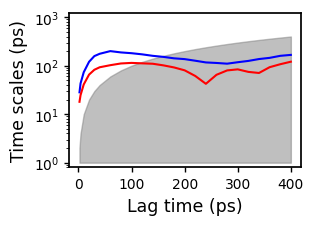

In [15]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(3,2)
plt.rcParams['axes.linewidth']=1.25
### One frame interval equals to 2 ps
plt.semilogy(np.array(lag_times)*2,its[:,0]*2,linewidth=1.5,c='blue')
plt.semilogy(np.array(lag_times)*2,its[:,1]*2,linewidth=1.5,c='red')
plt.ylim(0.8,1200)
plt.fill_between(np.array(lag_times)*2,np.ones(len(lag_times)),np.array(lag_times)*2,color='grey',alpha=0.5)
plt.tick_params(axis="both",labelsize=10,direction='out',length=3.75,width=1)
plt.xlabel('Lag time (ps)',fontsize=12.5)
plt.ylabel('Time scales (ps)',fontsize=12.5)

### Visualize CVs on $\theta_1$, $\theta_2$ space

In [12]:
theta = []
for i in range(1,41):
    tmp = np.load('../data/theta_trajs/traj%d.npy'%i)
    theta.append(tmp)

In [13]:
g = np.concatenate(graphvampnets_cvs)
g[:,0] = g[:,0] * -1 ### the sign of CV doesn't matter, here we change the sign for consistency.
t = np.concatenate(theta)

### Visualize CVs on 180*180 bins of theta1, theta2 space
cumulate_cv1 = np.zeros((180,180))
cumulate_cv2 = np.zeros((180,180))
cumulate_frame = np.zeros((180,180))
for i in range(len(g)):
    x = int(t[i,0])
    y = int(t[i,1])
    cumulate_cv1[x,y] = cumulate_cv1[x,y]+g[i,0]
    cumulate_cv2[x,y] = cumulate_cv2[x,y]+g[i,1]
    cumulate_frame[x,y] = cumulate_frame[x,y]+1
project_cv1 = cumulate_cv1/(cumulate_frame+np.ones((180,180))*1e-6)
project_cv2 = cumulate_cv2/(cumulate_frame+np.ones((180,180))*1e-6)
### rearange to compile the imshow plot
### before: colomn (top,down) -> theta1 (0,180)
### before: row (left,right) -> theta2 (0,180)
### after: row (left,right) -> theta1 (0,180)
### after: colomn (down,top) -> theta2 (0,180)
project_cv1 = project_cv1.T[:,::-1]
project_cv2 = project_cv2.T[:,::-1]

([<matplotlib.axis.YTick at 0x211ecbdfca0>,
 [Text(0, 0, '180'),
  Text(0, 60, '120'),
  Text(0, 120, '60'),
  Text(0, 180, '0')])

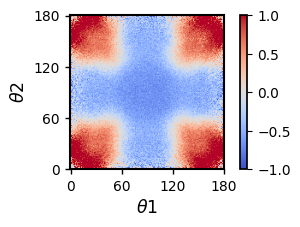

In [14]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(4,2))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
plt.imshow(project_cv1,cmap='coolwarm')
cb=plt.colorbar() 
cb.ax.tick_params(labelsize=10)
plt.clim(-1,1)
plt.xlabel(r'$\theta1$',fontsize=12.5)
plt.ylabel(r'$\theta2$',fontsize=12.5)
plt.tick_params(axis="both",labelsize=10,direction='out',length=3.75,width=1)
plt.xticks([0,60,120,180],[0,60,120,180])
plt.yticks([0,60,120,180],[180,120,60,0])

([<matplotlib.axis.YTick at 0x20cd2e89e50>,
 [Text(0, 0, '180'),
  Text(0, 60, '120'),
  Text(0, 120, '60'),
  Text(0, 180, '0')])

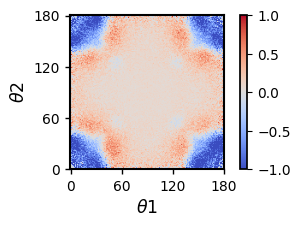

In [15]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
plt.imshow(project_cv2,cmap='coolwarm')
cb=plt.colorbar() 
cb.ax.tick_params(labelsize=10)
plt.clim(-1,1)
plt.xlabel(r'$\theta1$',fontsize=12.5)
plt.ylabel(r'$\theta2$',fontsize=12.5)
plt.tick_params(axis="both",labelsize=10,direction='out',length=3.75,width=1)
plt.xticks([0,60,120,180],[0,60,120,180])
plt.yticks([0,60,120,180],[180,120,60,0])

### Projection onto CVs constructed space

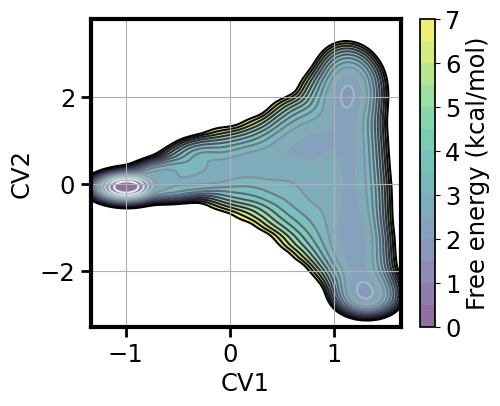

In [16]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(5,4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
#ax.set_aspect('equal', adjustable='box')
ax.xaxis.set_tick_params(labelsize=17.5,direction='out',length=7.5,width=2)
ax.yaxis.set_tick_params(labelsize=17.5,direction='out',length=7.5,width=2)
c = ContourPlot2D()
ax = c.plot(g,ax,labelsize=17.5,xlabel='CV1',ylabel='CV2')